In [ ]:
#Business Objective
As a Data analyst performing A/B Testing whether new promotion campaign significantly increasing average order value?

•	Define null/alternative hypotheses
•	Use statistical tests (t-test)
•	Visualize comparison charts
•	Conclude with confidence level

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import ttest_ind

In [5]:
df=pd.read_csv('ab_data.csv')
df["revenue"] = np.where(
    df["converted"] == 1,
    np.random.normal(1200, 300, size=len(df)),  # random revenue
    0
)
print(df)

        user_id                   timestamp      group landing_page  \
0        851104  2017-01-21 22:11:48.556739    control     old_page   
1        804228  2017-01-12 08:01:45.159739    control     old_page   
2        661590  2017-01-11 16:55:06.154213  treatment     new_page   
3        853541  2017-01-08 18:28:03.143765  treatment     new_page   
4        864975  2017-01-21 01:52:26.210827    control     old_page   
...         ...                         ...        ...          ...   
294473   751197  2017-01-03 22:28:38.630509    control     old_page   
294474   945152  2017-01-12 00:51:57.078372    control     old_page   
294475   734608  2017-01-22 11:45:03.439544    control     old_page   
294476   697314  2017-01-15 01:20:28.957438    control     old_page   
294477   715931  2017-01-16 12:40:24.467417  treatment     new_page   

        converted     revenue  
0               0    0.000000  
1               0    0.000000  
2               0    0.000000  
3               0  

In [7]:
print(df.info)
print(df.shape)
print(df.columns)
df=df.drop_duplicates()
df=df.dropna()

<bound method DataFrame.info of         user_id                   timestamp      group landing_page  \
0        851104  2017-01-21 22:11:48.556739    control     old_page   
1        804228  2017-01-12 08:01:45.159739    control     old_page   
2        661590  2017-01-11 16:55:06.154213  treatment     new_page   
3        853541  2017-01-08 18:28:03.143765  treatment     new_page   
4        864975  2017-01-21 01:52:26.210827    control     old_page   
...         ...                         ...        ...          ...   
294473   751197  2017-01-03 22:28:38.630509    control     old_page   
294474   945152  2017-01-12 00:51:57.078372    control     old_page   
294475   734608  2017-01-22 11:45:03.439544    control     old_page   
294476   697314  2017-01-15 01:20:28.957438    control     old_page   
294477   715931  2017-01-16 12:40:24.467417  treatment     new_page   

        converted     revenue  
0               0    0.000000  
1               0    0.000000  
2               0  

In [37]:
control=df[df["group"]=="control"]["revenue"]
test=df[df["group"]=="treatment"]["revenue"]

control_mean=control.mean()
test_mean=test.mean()

print(control_mean,test_mean)

144.57949616092193 142.96843215627854


294478
147202


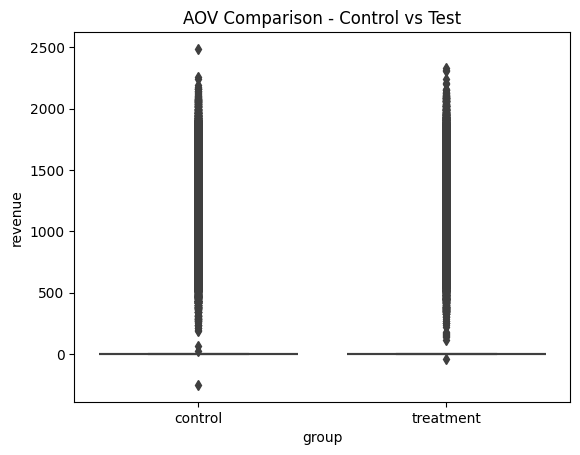

In [11]:
sns.boxplot(x="group", y="revenue", data=df)
plt.title("AOV Comparison - Control vs Test")
plt.show()

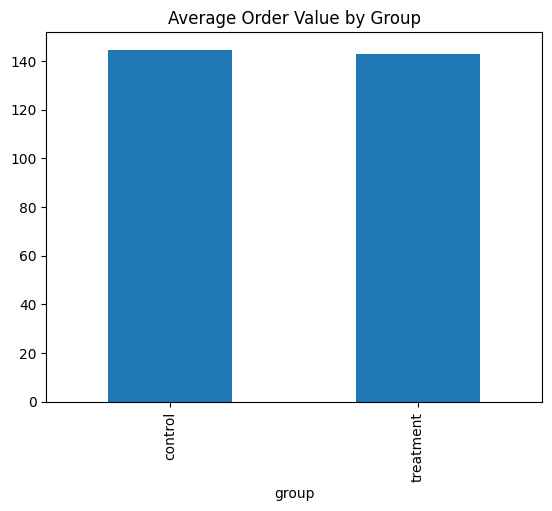

In [12]:
df.groupby("group")["revenue"].mean().plot(kind="bar")
plt.title("Average Order Value by Group")
plt.show()

In [ ]:
#Check Assumptions
1. Independence

2. Normality (Optional for large sample)

If sample > 30 → t-test is robust.

In [14]:
shapiro(control)
shapiro(test)

C:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 147202.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 147276.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.3952723937560555, pvalue=1.3854603458980387e-177)

In [17]:
t_stat, p_value = ttest_ind(test, control, alternative='greater')

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -1.0831810518222649
P-value: 0.8606355223350339


In [20]:
alpha=0.05

print(f"T-statistic : {t_stat:.4f}")
print(f"P_value :{p_value:.4f}")
print(f"alpha :{alpha:.4f}")

if p_value < alpha:
    print("Decision: Reject Null Hypothesis")
    print("Conclusion: Promotion significantly increases AOV")
else:
    print("Decision: Fail to Reject Null Hypothesis")
    print("Conclusion: No statistically significant increase in AOV")

T-statistic : -1.0832
P_value :0.8606
alpha :0.0500
Decision: Fail to Reject Null Hypothesis
Conclusion: No statistically significant increase in AOV


In [23]:
control_mean = control.mean()
test_mean = test.mean()

percent_increase = ((test_mean - control_mean) / control_mean) * 100

print(percent_increase)

-1.1143101528381496


In [24]:
print("----- RESULT SUMMARY -----")
print(f"Control AOV: ₹{control_mean:.2f}")
print(f"Test AOV: ₹{test_mean:.2f}")
print(f"Lift in AOV: {percent_increase:.2f}%")
print(f"P-value: {p_value:.4f}")
print(f"Confidence Level: 95%")

----- RESULT SUMMARY -----
Control AOV: ₹144.58
Test AOV: ₹142.97
Lift in AOV: -1.11%
P-value: 0.8606
Confidence Level: 95%


In [38]:
monthly_users = len(df['user_id'])

revenue_lift_per_user = control_mean-test_mean
print(revenue_lift_per_user)

additional_monthly_revenue = revenue_lift_per_user * monthly_users

print("----- BUSINESS IMPACT -----")
print(f"Estimated Additional Monthly Revenue: ₹{additional_monthly_revenue:,.2f}")

1.6110640046433957
----- BUSINESS IMPACT -----
Estimated Additional Monthly Revenue: ₹474,422.91


In [31]:
print("----- RECOMMENDATION -----")

if p_value < alpha:
    print("✔ Roll out promotion to all users.")
    print("✔ Monitor long-term profitability.")
    print("✔ Run retention analysis.")
else:
    print("✘ Do NOT scale campaign.")
    print("✔ Investigate targeting strategy.")
    print("✔ Perform segmented analysis.")

----- RECOMMENDATION -----
✘ Do NOT scale campaign.
✔ Investigate targeting strategy.
✔ Perform segmented analysis.


In [ ]:
#final Recommendation

The treatment group showed a -1.1% lower average order value compared to control. 
Statistical testing was conducted to determined the difference is not Significant 

In [27]:
excel_df= df.to_csv('AOV_result.csv')h

In [35]:
summary={"Control AOV": control_mean,
"Test AOV": test_mean,
"Lift in AOV": percent_increase,
"P-value": p_value,
"T_Statistic": t_stat,
"Additional_Monthly_Revenue": additional_monthly_revenue,
"No_of_users": len(df['user_id'])}


pd.DataFrame([summary]).to_excel("ab_testing_summary.xlsx", index=False)